In [1]:
from IPython.display import display, HTML   # enlargen jupyter notebook window

display(HTML(data="""
<style>
    div#notebook-container    { width: 80%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 70%; }
</style>
"""))

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as mticker
import matplotlib.colors as colors
from cartopy import crs as ccrs

# Simple Plotting

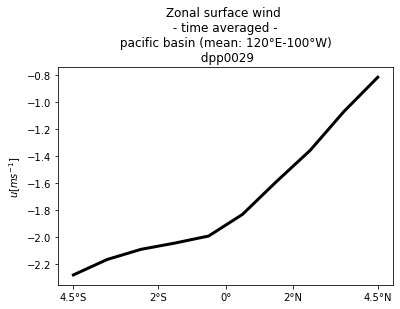

In [3]:
fname_ua = '/pf/m/m300845/_work_pc/data/icon/dpp0029/atm/3d/dpp0029_ml_ua_2020_1x1.nc'    ### importing data
ds_ua    = xr.open_dataset(fname_ua)

time_ua = ".isel({'time': slice(1,343)}).mean(dim='time')"                                ### slicing data
plev_ua = ".isel(height=89)"                                       
lon_ua  = ".mean({'lon': slice(120,260)})"
lat_ua  = ".sel({'lat': slice(-4.5,4.5)})"

x_ua    = ds_ua.lat.sel({'lat': slice(-4.5,4.5)})                                         ### collecting data
y_ua    = eval('ds_ua.ua' + f"{time_ua}{plev_ua}{lon_ua}{lat_ua}")

fig, ax = plt.subplots()
ax.plot(x_ua, y_ua, color = "black", linewidth = 3)
ax.set_title("Zonal surface wind \n - time averaged - \n pacific basin (mean: 120°E-100°W) \n dpp0029")
ax.set_ylabel("$u [m s^{-1}]$")
ax.set_xticks([-4.5,-2,0,2,4.5])
ax.set_xticklabels([u'4.5\N{DEGREE SIGN}S', u'2\N{DEGREE SIGN}S', u'0\N{DEGREE SIGN}', u'2\N{DEGREE SIGN}N', u'4.5\N{DEGREE SIGN}N'])
plt.show()

# Wind Field

In [4]:
fname_ua = '/pf/m/m300845/_work_pc/data/icon/dpp0029/atm/3d/dpp0029_ml_ua_2020_1x1.nc'    ### importing data
ds_ua  = xr.open_dataset(fname_ua)

fname_va = '/pf/m/m300845/_work_pc/data/icon/dpp0029/atm/3d/dpp0029_ml_va_2020_1x1.nc'
ds_va  = xr.open_dataset(fname_va)

time = ".isel({'time': slice(1,343)}).mean(dim='time')"                                   ### slicing data         
plev = ".isel(height=89)"                                           
lon  = ".sel({'lon': slice(120,260)})"
lat  = ".sel({'lat': slice(-26,26)})"

x_ua    = eval('ds_ua.lon' + f"{lon}")                                                     ### collecting data
y_ua    = eval('ds_ua.lat' + f"{lat}")
z_ua    = eval('ds_ua.ua'  + f"{time}{plev}{lon}{lat}")

x_va    = eval('ds_va.lon' + f"{lon}")
y_va    = eval('ds_va.lat' + f"{lat}")
z_va    = eval('ds_va.va'  + f"{time}{plev}{lon}{lat}")

(18, 47)
(18, 47)


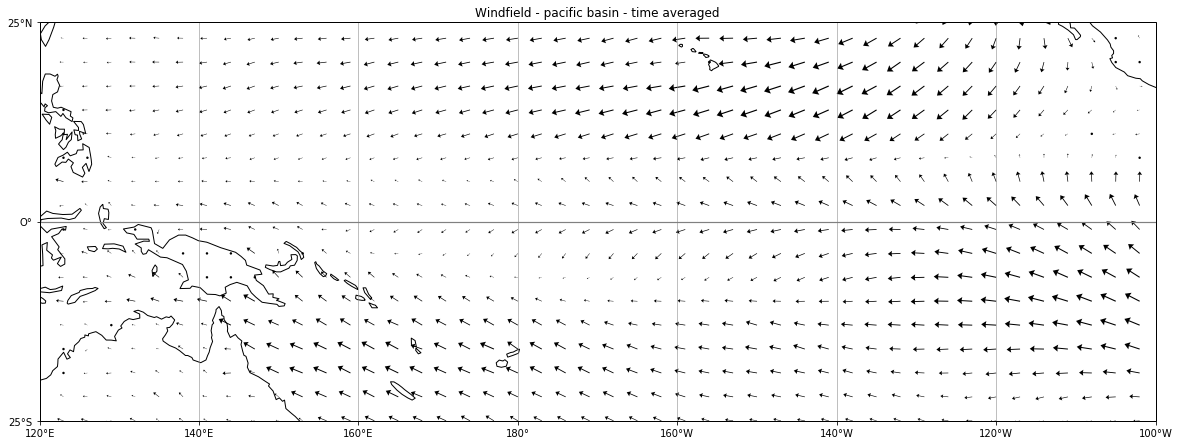

In [5]:
ct_z_ua = z_ua
ct_z_va = z_va

ct_z_ua = ct_z_ua[::3,::3]      ### plotting every third point otherwise the arrows are too much
ct_z_va = ct_z_va[::3,::3]

X,Y     = np.meshgrid(np.arange(-60,81,3), np.arange(-25,27,3))  ### making meshgrid fro arrows
print(ct_z_ua.shape)
print(X.shape)
earth_projection = ccrs.PlateCarree(central_longitude=180)

fig, ax = plt.subplots(figsize=(20,10))

ax = plt.axes(projection=earth_projection)

ax.coastlines(color='black')

ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', xlocs=range(-180,181,20), ylocs=range(-25,26,25))

ax.set_title("Windfield - pacific basin - time averaged", loc='center')

plt.quiver(X,Y, ct_z_ua, ct_z_va, scale = 500, headlength = 5, headwidth = 7, minshaft = 3)

ax.set_xlim(-60,80)
ax.set_ylim(-25,25)
ax.set_xticks([-60,-40,-20,0,20,40,60,80])
ax.set_xticklabels([u'120\N{DEGREE SIGN}E', u'140\N{DEGREE SIGN}E', u'160\N{DEGREE SIGN}E', u'180\N{DEGREE SIGN}', u'160\N{DEGREE SIGN}W', u'140\N{DEGREE SIGN}W', u'120\N{DEGREE SIGN}W', u'100\N{DEGREE SIGN}W'])
ax.set_yticks([-25,0,25])
ax.set_yticklabels([u'25\N{DEGREE SIGN}S', u'O\N{DEGREE SIGN}', u'25\N{DEGREE SIGN}N'])

plt.hlines(0,-60,80, linestyles='solid', linewidth=1.2, color = "grey")

plt.show()

# Contour Plot

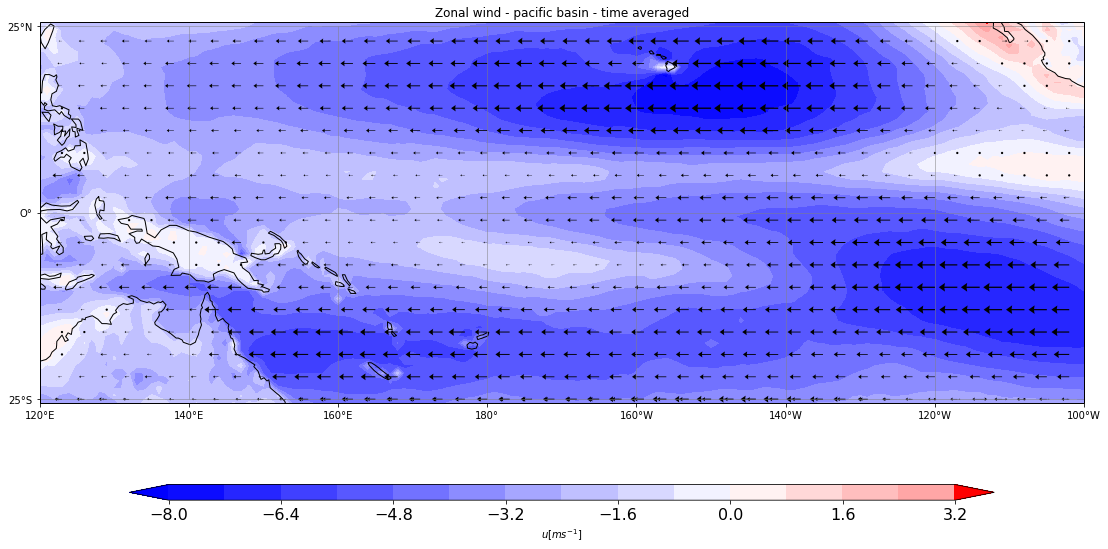

In [9]:
ct_z_ua = z_ua
zeros   = np.zeros((52, 141))

ct_z_ua = ct_z_ua[::3,::3]
zeros   = zeros [::3,::3]

X,Y     = np.meshgrid(np.arange(-60,81,3), np.arange(-25,25,3))

x_ua   -= 180

earth_projection = ccrs.PlateCarree(central_longitude=180)

fig, ax = plt.subplots(figsize=(20,10))

ax = plt.axes(projection=earth_projection)

ax.coastlines(color='black')

ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', xlocs=range(-180,181,20), ylocs=range(-25,26,25))

ax.set_title("Zonal wind - pacific basin - time averaged", loc='center')

normalize = colors.Normalize(vmin=-8, vmax=8)

pacific_basin = ax.contourf(x_ua, y_ua, z_ua, cmap='bwr', levels=14, norm = normalize, transform=earth_projection, extend="both")

plt.quiver(X,Y, ct_z_ua, zeros, scale = 400, headlength = 5, headwidth = 7, minshaft = 3)

ax.set_xticks([-60,-40,-20,0,20,40,60,80])
ax.set_xticklabels([u'120\N{DEGREE SIGN}E', u'140\N{DEGREE SIGN}E', u'160\N{DEGREE SIGN}E', u'180\N{DEGREE SIGN}', u'160\N{DEGREE SIGN}W', u'140\N{DEGREE SIGN}W', u'120\N{DEGREE SIGN}W', u'100\N{DEGREE SIGN}W'])
ax.set_yticks([-25,0,25])
ax.set_yticklabels([u'25\N{DEGREE SIGN}S', u'O\N{DEGREE SIGN}', u'25\N{DEGREE SIGN}N'])

cbar  = plt.colorbar(pacific_basin, orientation='horizontal', shrink=0.775, aspect = 50)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('$u [m s^{-1}]$')

plt.show()